In [1]:
#preload some datasets

import sklearn.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
import math

# Want a variety of datasets such that:
## Num of features are varied but datapoints are similar (to measure speed vs feature size)
## Num of datapoints are varied but features are similar (to measure speed vs dataset size)

## DATASET 1: IRIS FROM SKLEARN
# imported as dictionary {'data':, 'target':, 'target_names':}
iris_dataset = datasets.load_iris()
iris_data = np.array(iris_dataset['data'])
iris_target = np.array(iris_dataset['target'])

## DATASET 2: WINE FROM SKLEARN
wine_dataset = datasets.load_wine()
wine_data = np.array(wine_dataset['data'])
wine_target = np.array(wine_dataset['target'])

## DATASET 3: BREAST CANCER FROM SKLEARN
bcancer_dataset = datasets.load_breast_cancer()
bcancer_data = np.array(bcancer_dataset['data'])
bcancer_target = np.array(bcancer_dataset['target'])


print("iris shape", iris_data.shape)
print("wine shape", wine_data.shape)
print("bcancer shape", bcancer_data.shape)


iris shape (150, 4)
wine shape (178, 13)
bcancer shape (569, 30)


In [2]:
#Likely also some ways to generate fake datasets

from sklearn.datasets import make_blobs

def generate_fake_dataset(samples, features, centers, std, centerbox):
    blobs, classes = make_blobs(n_samples=samples, n_features=features, centers=centers, cluster_std=std, random_state=100, center_box=centerbox)
    return blobs, classes

def plot_dataset_2D(samples, classes):
    plt.scatter(samples[:,0], samples[:,1], c=classes)
    #plt.xlim(0,1)
    #plt.ylim(0,1)
    plt.show()
    return

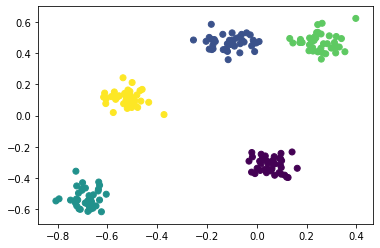

In [34]:
testx, testy = generate_fake_dataset(200, 2, 5, 0.05, (-0.7,0.7))
plot_dataset_2D(testx, testy)

In [4]:
import time
from copy import deepcopy
import os
import sys
from IPython.display import Image

print(time.time())

1588236278.8347085


In [25]:
import random

def distance(point1, point2):
    return np.sqrt(np.sum((point1-point2)*(point1-point2)))

def nearest_neighbor_classical(points, centroid_list):
    class_array = np.zeros(points.shape[0])
    # assign each point to a class
    for i in range(points.shape[0]):
        min_index = np.argmin(np.array([distance(points[i], centroid) for centroid in centroid_list]))
        class_array[i] = min_index 
    return class_array

def centroid_update(points, class_array, centroid_list):
    temp_centroid_list = deepcopy(centroid_list)
    #print(class_array)
    for i in range(centroid_list.shape[0]):
        # probably need to fix this
        #print(points.shape)
        #print(temp_centroid_list[i])
        class_sum = np.zeros(points.shape[1])
        class_num = 0
        for j in range(points.shape[0]):
            if class_array[j] == i:
                class_sum += points[j]
                class_num += 1
        temp_centroid_list[i] = np.divide(class_sum, class_num)
        #print("centroid", temp_centroid_list[i])
        #print(class_num)
    return temp_centroid_list

def kmeans_classical(samples, class_num):
    # choose 6 random samples to be the centroids
    indices = random.sample(range(samples.shape[0]), class_num)
    centroid_list = np.array([samples[i] for i in indices])
    #print(centroid_list)
    
    old_class = np.zeros(samples.shape[0])
    stop_flag = False
    old_centroid_list = centroid_list
    start_time = time.time()
    counter = 0
    #print('old', old_centroid_list)
    
    # assign classes based on current centroids
    while not stop_flag:
        counter +=1
        #print(counter)
        new_class = nearest_neighbor_classical(samples, old_centroid_list)
        new_centroid_list = centroid_update(samples, new_class, old_centroid_list)
        #print(np.array(old_centroid_list))
        #print(np.array(new_centroid_list))
        #print(new_class)
        if np.sum(np.array(new_centroid_list-old_centroid_list)) == 0:
            stop_flag = True
            stop_time = time.time()
        else:
            #print("else reached")
            old_centroid_list = new_centroid_list
            #old_class = new_class
    timetaken = stop_time - start_time
    #print("time taken: ", stop_time - start_time, " seconds")
    return samples, new_class, new_centroid_list, timetaken
    

In [21]:
a, b, c, _ = kmeans_classical(testx, 5)
print(a[0])

C:\Users\miles\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


KeyboardInterrupt: 

In [ ]:
plot_dataset_2D(a, b)

In [ ]:
# measure accuary (AUC?)
#import sklearn.metrics as metrics

def accuracy(class_list, ground_truth):
    diff = class_list - ground_truth
    #print(diff)
    zero_counter = 0
    
    for entry in diff:
        if entry == 0:
            zero_counter += 1
    
    return zero_counter/class_list.shape[0]

#multiclass not supported
#def AUC(class_list, ground_truth):
#    return metrics.roc_auc_score(ground_truth, class_list)

In [33]:
import sklearn.metrics as m

# Trial 1: Changing Sample Size. 3 trials each

samplesize = [20,40,60,80,100,120,140,160,180,200]

for size in samplesize:
    print("starting size: ", size)
    times=0
    vscore=0
    for trial in range(3):
        #print("trial: ", trial)
        testx, testy = generate_fake_dataset(size, 2, 5, 0.15, (-0.7,0.7))
        samples, newclass, newcentroids, timetaken = kmeans_classical(testx, 5)
        #print("v score: ", m.v_measure_score(newclass, testy))
        times += timetaken
        vscore += m.v_measure_score(newclass, testy)
    print("avg time", times/3, "avg vscore", vscore/3)

starting size:  20
avg time 0.0029938220977783203 avg vscore 0.7900588157387155
starting size:  40
avg time 0.007007439931233724 avg vscore 0.8087889655612722
starting size:  60
avg time 0.035160223642985024 avg vscore 0.8258221543792085
starting size:  80
avg time 0.033826589584350586 avg vscore 0.8756594526317946
starting size:  100
avg time 0.022942543029785156 avg vscore 0.816293206278779
starting size:  120
avg time 0.02594153086344401 avg vscore 0.8190257287960675
starting size:  140
avg time 0.04913139343261719 avg vscore 0.7936792782367025
starting size:  160
avg time 0.04791378974914551 avg vscore 0.8053343541725125
starting size:  180
avg time 0.062152465184529625 avg vscore 0.7260093051481018
starting size:  200
avg time 0.062153895696004234 avg vscore 0.8212082203173793


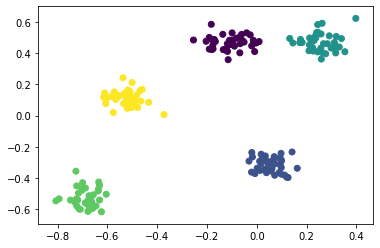

In [53]:
testx, testy = generate_fake_dataset(200, 2, 5, 0.05, (-0.7,0.7))
samples, newclass, newcentroids, timetaken = kmeans_classical(testx, 5)
plot_dataset_2D(samples, newclass)

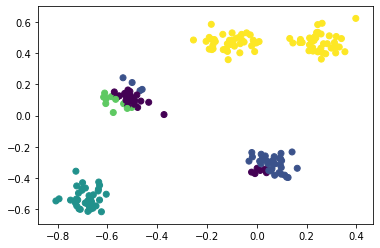

In [55]:
samples, newclass, newcentroids, timetaken = kmeans_quantum(testx, 5)
plot_dataset_2D(samples, newclass)

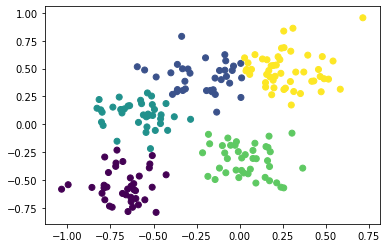

In [56]:
testx, testy = generate_fake_dataset(200, 2, 5, 0.15, (-0.7,0.7))
samples, newclass, newcentroids, timetaken = kmeans_classical(testx, 5)
plot_dataset_2D(samples, newclass)

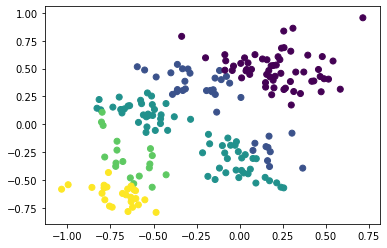

In [58]:
samples, newclass, newcentroids, timetaken = kmeans_quantum(testx, 5)
plot_dataset_2D(samples, newclass)

In [27]:
import sklearn

# Trial 2: Changing Feature Size. 3 trials each

featuresize = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
for size in featuresize:
    print("starting size: ", size)
    for trial in range(3):
        print("trial: ", trial)
        testx, testy = generate_fake_dataset(10000, size, 5, 0.05, (0.2,0.8))
        samples, newclass, newcentroids = kmeans_classical(testx, 5)
        print("v score: ", sklearn.metrics.v_measure_score(newclass, testy))

starting size:  2
trial:  0


KeyboardInterrupt: 

In [40]:
# import math lib
from math import pi

# import Qiskit
from qiskit import Aer, IBMQ, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

# To use local qasm simulator
backend = Aer.get_backend('qasm_simulator')

def get_theta(d):
    x = d[0]
    y = d[1]
    
    theta = 2*math.acos((x+y)/2.0)
    #theta = math.atan2(y,x)
    return theta

def get_Distance(x,y):
    theta_1 = get_theta(x)
    theta_2 = get_theta(y) 
    #theta_diff = abs(theta_1-theta_2)   
    #start_time = time.time()
    # create Quantum Register called "qr" with 3 qubits
    qr = QuantumRegister(2, name="qr")
    # create Classical Register called "cr" with 5 bits
    cr = ClassicalRegister(1, name="cr")

    # Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
    # and your Classical Register "cr"
    qc = QuantumCircuit(qr, cr, name="k_means")
    
    qc.h(qr[0])
    qc.cnot(qr[0], qr[1])
    qc.ry(-theta_1, qr[1])
    qc.cnot(qr[0], qr[1])
    qc.x(qr[0])
    qc.ry(theta_1, qr[1])
    qc.cnot(qr[0], qr[1])
    qc.ry(-theta_2, qr[1])
    qc.cnot(qr[0], qr[1])
    qc.ry(theta_2, qr[1])
    qc.h(qr[0])
    qc.measure(qr[0], cr[0])

    #print('----before run----')
    job = execute(qc,backend=backend, shots=4096)
    #print('----after run----')
    result = job.result()
    #data = result.get_data()['counts']
    data = result.get_counts(qc)
    #end_time = time.time()
    #print("1 epoch time: ", end_time-start_time)
    #print(data)
    
    if len(data)==1:
        return 0.0
    else:
        return data['1']
    
def get_Distances(x,y):    
    theta_1 = get_theta(x)
    theta_2 = get_theta(y)
    theta_diff = abs(theta_1 - theta_2)

    qr = QuantumRegister(2, name="qr")
    # create Classical Register called "cr" with 5 bits
    cr = ClassicalRegister(1, name="cr")

    # Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
    # and your Classical Register "cr"
    qc = QuantumCircuit(qr, cr, name="k_means")

    qc.h(qr[0])
    #qc.h(qr[1])
    #qc.h(qr[2])
    #qc.u3(theta_1, pi, pi, qr[1])
    #qc.u3(theta_2, pi, pi, qr[2])
    qc.cnot(qr[0], qr[1])
    qc.ry(-theta_diff, qr[1])
    qc.cnot(qr[0], qr[1])
    qc.ry(theta_diff, qr[1])
    #qc.cswap(qr[0], qr[1], qr[2])
    qc.h(qr[0])
    qc.measure(qr[0], cr[0])

    #qc.reset(qr)
    #qc.draw(output='mpl')

    # eseguo il circuito costruito sulla coppia I,J
    job_exp = execute(qc, backend=backend, shots=2048) 
    result = job_exp.result()
    # calculate the ratio between the 0 and tha one result in measure registry
    v1=result.get_counts(qc)['000']
    if '010' in result.get_counts(qc):
        v2=result.get_counts(qc)['010']
    else:
        v2=0
    prob=v2/(v1+v2) # Probability of obtaining 1 that is "quantum distance"
    return prob
    
def get_data(n,k,std):
    data = make_blobs(n_samples=n, n_features=2, centers=k, cluster_std=std, random_state=100)
    points = data[0]
    centers = data[1]
    
    return points,centers

def draw_plot(points,centers,label=True):
    if label==False:
        plt.scatter(points[:,0], points[:,1])
    else:
        plt.scatter(points[:,0], points[:,1], c=centers, cmap='viridis')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()
    
def plot_centroids(centers):
    plt.scatter(centers[:,0], centers[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()
    
def initialize_centers(points,k):
    return points[np.random.randint(points.shape[0],size=k),:]

def get_distance(p1, p2):
    return np.sqrt(np.sum((p1-p2)*(p1-p2)))

def find_nearest_neighbour(points,centroids):
    
    n = len(points)
    k = centroids.shape[0]
    centers = np.zeros(n)    
    for i in range(n):
        min_dis = 10000
        ind = 0
        for j in range(k):
            
            temp_dis = get_Distance(points[i,:],centroids[j,:])
            
            if temp_dis < min_dis:
                min_dis = temp_dis
                ind = j
        centers[i] = ind
    
    return centers

def nearest_neighbor_quantum(points, centroid_list):
    class_array = np.zeros(points.shape[0])
    # assign each point to a class
    for i in range(points.shape[0]):
        distance_array = np.array([get_Distance(points[i], centroid) for centroid in centroid_list])
        #print(distance_array)
        min_index = np.argmin(distance_array)
        class_array[i] = min_index 
    return class_array

def find_centroids(points,centers):
    n = len(points)
    k = int(np.max(centers))+1
   
    centroids = np.zeros([k,2])
    
    for i in range(k):
        #print(points[centers==i])
        centroids[i,:] = np.average(points[centers==i])
        
    return centroids

def centroid_update(points, class_array, centroid_list):
    temp_centroid_list = deepcopy(centroid_list)
    for i in range(centroid_list.shape[0]):
        # probably need to fix this
        #print(points.shape)
        #print(temp_centroid_list[i])
        class_sum = np.zeros(points.shape[1])
        class_num = 0
        for j in range(points.shape[0]):
            if class_array[j] == i:
                class_sum += points[j]
                class_num += 1
        if class_num == 0:
            temp_centroid_list[i] = 0
        else:
            temp_centroid_list[i] = np.divide(class_sum, class_num)
        #print("centroid", temp_centroid_list[i])
        #if class_num ==0:
        #    print(temp_centroid_list[i])
    return temp_centroid_list

def preprocess(points):
    n = len(points)
    x = 30.0*np.sqrt(2)
    for i in range(n):
        points[i,:]+=15
        points[i,:]/=x
    
    return points

def kmeans_quantum(samples, class_num):
    # choose 6 random samples to be the centroids
    #samples = preprocess(samples)
    indices = random.sample(range(samples.shape[0]), class_num)
    centroid_list = np.array([samples[i] for i in indices])
    #print(centroid_list)
    
    #old_class = np.zeros(samples.shape[0])
    stop_flag = False
    old_centroid_list = centroid_list
    start_time = time.time()
    counter = 0
    #print('old', old_centroid_list)
    
    # assign classes based on current centroids
    while not stop_flag:
        counter +=1
        #print(counter)
        new_class = nearest_neighbor_quantum(samples, old_centroid_list)
        new_centroid_list = centroid_update(samples, new_class, old_centroid_list)
        #print(np.array(old_centroid_list))
        #print(np.array(new_centroid_list))
        #print(new_class)
        if np.sum(np.array(new_centroid_list-old_centroid_list)) < 1e-07:
            stop_flag = True
            stop_time = time.time()
        else:
            #print("else reached")
            old_centroid_list = new_centroid_list
            #old_class = new_class
    timetaken = stop_time - start_time
    #print("time taken: ", stop_time - start_time, " seconds")
    return samples, new_class, new_centroid_list, timetaken

In [41]:
import sklearn.metrics as m

# Trial 1: Changing Sample Size. 3 trials each

samplesize = [20,40,60,80,100,120,140,160,180,200]

for size in samplesize:
    print("starting size: ", size)
    times=0
    vscore=0
    for trial in range(3):
        #print("trial: ", trial)
        testx, testy = generate_fake_dataset(size, 2, 5, 0.05, (-0.7,0.7))
        samples, newclass, newcentroids, timetaken = kmeans_quantum(testx, 5)
        #print("v score: ", m.v_measure_score(newclass, testy))
        times += timetaken
        vscore += m.v_measure_score(newclass, testy)
    print("avg time", times/3, "avg vscore", vscore/3)

starting size:  20
avg time 1.6976635456085205 avg vscore 0.7865975064338908
starting size:  40
avg time 4.1670552889506025 avg vscore 0.7006449413855497
starting size:  60
avg time 6.45301349957784 avg vscore 0.7952820944699739
starting size:  80
avg time 5.61054007212321 avg vscore 0.7747610639469285
starting size:  100
avg time 14.867709477742514 avg vscore 0.8182867877999898
starting size:  120
avg time 15.810306151707968 avg vscore 0.7868288166982733
starting size:  140
avg time 25.12029441197713 avg vscore 0.802975437118191
starting size:  160
avg time 43.60994950930277 avg vscore 0.8316910658495683
starting size:  180
avg time 19.375191688537598 avg vscore 0.7628565327255897
starting size:  200
avg time 14.123887141545614 avg vscore 0.7938562338000829


In [42]:
import sklearn.metrics as m

# Trial 1: Changing Sample Size. 3 trials each

samplesize = [20,40,60,80,100,120,140,160,180,200]

for size in samplesize:
    print("starting size: ", size)
    times=0
    vscore=0
    for trial in range(3):
        #print("trial: ", trial)
        testx, testy = generate_fake_dataset(size, 2, 5, 0.15, (-0.7,0.7))
        samples, newclass, newcentroids, timetaken = kmeans_quantum(testx, 5)
        #print("v score: ", m.v_measure_score(newclass, testy))
        times += timetaken
        vscore += m.v_measure_score(newclass, testy)
    print("avg time", times/3, "avg vscore", vscore/3)

starting size:  20
avg time 2.7925546964009604 avg vscore 0.8115461539902554
starting size:  40
avg time 4.191582282384236 avg vscore 0.62594177222187
starting size:  60
avg time 3.102759917577108 avg vscore 0.6338233078856822
starting size:  80
avg time 3.984814723332723 avg vscore 0.5997307222231285
starting size:  100
avg time 13.960313558578491 avg vscore 0.5913839074311218
starting size:  120
avg time 10.31534512837728 avg vscore 0.5954633107105317
starting size:  140
avg time 14.381454229354858 avg vscore 0.5854534885843422
starting size:  160
avg time 8.252721150716146 avg vscore 0.5080315259553511
starting size:  180
avg time 108.1432336171468 avg vscore 0.5620745352258188
starting size:  200
avg time 32.050187269846596 avg vscore 0.637179794312626


In [43]:
times=0
vscore=0
for trial in range(3):
    #print("trial: ", trial)
    testx, testy = generate_fake_dataset(180, 2, 5, 0.15, (-0.7,0.7))
    samples, newclass, newcentroids, timetaken = kmeans_quantum(testx, 5)
    #print("v score: ", m.v_measure_score(newclass, testy))
    times += timetaken
    vscore += m.v_measure_score(newclass, testy)
print("avg time", times/3, "avg vscore", vscore/3)

avg time 9.57880171140035 avg vscore 0.48455859121314776


In [ ]:
testx, testy = generate_fake_dataset(200, 2, 5, 0.1, (-0.7,0.7))
plot_dataset_2D(testx, testy)

In [ ]:
a, b, c = kmeans_classical(testx, 5)
print(a[0])
print("v score: ", sklearn.metrics.v_measure_score(b, testy))
plot_dataset_2D(a, b)

In [ ]:
a, b, c = kmeans_quantum(testx, 5)
print(a[0])
print("v score: ", sklearn.metrics.v_measure_score(b, testy))
plot_dataset_2D(a, b)

print(b, c)

In [ ]:
testx, testy = generate_fake_dataset(2000, 2, 5, 0.05, (0.2,0.8))
plot_dataset_2D(testx, testy)

In [ ]:
a, b, c = kmeans_quantum(testx, 5)
print(a[0])
print("v score: ", sklearn.metrics.v_measure_score(b, testy))
plot_dataset_2D(a, b)

In [ ]:
qr = QuantumRegister(2, name="qr")
# create Classical Register called "cr" with 5 bits
cr = ClassicalRegister(1, name="cr")

# Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qc = QuantumCircuit(qr, cr, name="k_means")

#qc.h(qr[1])
#qc.h(qr[2])
#qc.u3(theta_1, pi, pi, qr[1])
#qc.u3(theta_2, pi, pi, qr[2])
qc.h(qr[0])
qc.cnot(qr[0], qr[1])
qc.ry(-.1, qr[1])
qc.cnot(qr[0], qr[1])
qc.x(qr[0])
qc.ry(.1, qr[1])
qc.cnot(0, qr[1])
qc.ry(-.2, qr[1])
qc.cnot(qr[0], qr[1])
qc.ry(.2, qr[1])
qc.h(qr[0])
qc.measure(qr[0], cr[0])
#qc.cswap(qr[0], qr[1], qr[2])


#qc.reset(qr)
qc.draw(output='mpl')

In [ ]:
import sklearn

#print(accuracy(b,testy))
#print(AUC(b, testy))

#print(metrics.adjusted_rand_score(b, testy))


#print(metrics.cluster.completeness_score(b, testy))

# go with v_measure_score
print(sklearn.metrics.v_measure_score(b, testy))

In [ ]:
# quantum k means
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.tools.visualization import plot_histogram
from qutip import *
from IPython.display import Image
%matplotlib inline

backend = Aer.get_backend('qasm_simulator')

In [ ]:
# might need to preprocess points to fit between 0.0 and 1.0 spectrum

def quantum_circuit(quantum_bit_num, classical_bit_num, x, y):
    qr = QuantumRegister(quantum_bit_num)
    cr = ClassicalRegister(classical_bit_num)
    
    qc = QuantumCircuit(qr, cr)
    
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])
    #print(x[0], x[1])
    qc.u3(2*math.acos((x[0]+x[1])/2.0), math.pi, math.pi, qr[1])
    qc.u3(2*math.acos((y[0]+y[1])/2.0), math.pi, math.pi, qr[2])
    qc.cswap(qr[0], qr[1], qr[2])
    qc.h(qr[0])
    qc.measure(qr[0], cr[0])
    qc.reset(qr)
    
    qc.draw(output='mpl')
    
    job = execute(qc, backend=backend, shots=1024)
    result = job.result()
    plot_histogram(result.get_counts(qc))
    
    print()
    
    #if len(data)==1:
    #    return 0.0
    #else:
    #    return data['001']/1024.0
    return qc, result

In [ ]:
qc, result = quantum_circuit(3,3, a[2], c[1])

In [ ]:
qc.draw(output='mpl')

In [ ]:
print(result.get_counts(qc))
plot_histogram(result.get_counts(qc))

In [ ]:
def nearest_neighbor_classical(points, centroid_list):
    class_array = np.zeros(points.shape[0])
    # assign each point to a class
    for i in range(points.shape[0]):
        min_index = np.argmin([distance(points[i], centroid) for centroid in centroid_list])
        class_array[i] = min_index 
    return class_array

def kmeans_quantum(samples, class_num):
    # choose 6 random samples to be the centroids
    indices = np.random.randint(samples.shape[0], size=class_num)
    centroid_list = np.array([samples[i] for i in indices])
    #print(centroid_list)
    
    #old_class = np.zeros(samples.shape[0])
    stop_flag = False
    old_centroid_list = centroid_list
    start_time = time.time()
    counter = 0
    #print('old', old_centroid_list)
    
    # assign classes based on current centroids
    while not stop_flag:
        counter +=1
        #print(counter)
        new_class = nearest_neighbor_quantum(samples, old_centroid_list)
        new_centroid_list = centroid_update(samples, new_class, old_centroid_list)
        #print(np.array(old_centroid_list))
        #print(np.array(new_centroid_list))
        #print(new_class)
        if np.sum(np.array(new_centroid_list-old_centroid_list)) == 0:
            stop_flag = True
            stop_time = time.time()
        else:
            #print("else reached")
            old_centroid_list = new_centroid_list
            #old_class = new_class
    print("time taken: ", stop_time - start_time, " seconds")
    return samples, new_class, new_centroid_list
    

In [ ]:
# Implementing K-Means
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
import time
import sklearn.metrics as metrics

def K_Means(features, target, search_grid):
    kmeans = KMeans()
    kmeans_random = RandomizedSearchCV(estimator = kmeans, param_distributions = search_grid)
    time_start = time.time()
    
    search = kmeans_random.fit(features, target)
    k_final = search.best_estimator_
    print('time taken: ', time.time() - time_start)
    print(k_final)
    print(search.best_score_)
    return 

In [ ]:
n_clusters = [2,3,4,5,6,7,8,9,10] 
n_init = [2,5,10,20]
max_iter = [300,600,1000]
tol = [1e-4]
precompute_distances = ['auto', True, False]
njobs = [-1]
algorithm = ['auto', 'full', 'elkan']

random_grid = {
    'n_clusters': n_clusters,
    'n_init' : n_init,
    'max_iter' : max_iter,
    'tol' : tol,
    'precompute_distances' : precompute_distances,
    'n_jobs' : njobs,
    'algorithm' : algorithm
               }

In [ ]:
K_Means(iris_data, iris_target, random_grid)

In [ ]:
K_Means(wine_data, wine_target, random_grid)

In [ ]:
K_Means(bcancer_data, bcancer_target, random_grid)